<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Removing Duplicates**


Estimated time needed: **30** minutes


## Introduction


In this lab, you will focus on data wrangling, an important step in preparing data for analysis. Data wrangling involves cleaning and organizing data to make it suitable for analysis. One key task in this process is removing duplicate entries, which are repeated entries that can distort analysis and lead to inaccurate conclusions.  


## Objectives


In this lab you will perform the following:


1. Identify duplicate rows  in the dataset.
2. Use suitable techniques to remove duplicate rows and verify the removal.
3. Summarize how to handle missing values appropriately.
4. Use ConvertedCompYearly to normalize compensation data.
   


### Install the Required Libraries


In [1]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 132.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 157.8 MB/s eta 0:00:00


### Step 1: Import Required Libraries


In [2]:
import pandas as pd

In [3]:
pd.set_option('display.max_rows', None)

### Step 2: Load the Dataset into a DataFrame



load the dataset using pd.read_csv()


In [4]:
# Define the URL of the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Note: If you are working on a local Jupyter environment, you can use the URL directly in the <code>pandas.read_csv()</code>  function as shown below:**



#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")


### Step 3: Identifying Duplicate Rows


**Task 1: Identify Duplicate Rows**
  1. Count the number of duplicate rows in the dataset.
  2. Display the first few duplicate rows to understand their structure.


In [5]:
df.shape

(65457, 114)

In [6]:
## Write your code here
# duplicate_mask = df.duplicated(subset=['MainBranch','Employment'],keep=False)
duplicate_mask = df.duplicated()
duplicate = df[duplicate_mask]
print(f"No of duplicate columns are: {duplicate.shape[0]}")

duplicate.head()

No of duplicate columns are: 20


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
65437,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65438,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
65439,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
65440,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
65441,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 4: Removing Duplicate Rows


**Task 2: Remove Duplicates**
   1. Remove duplicate rows from the dataset using the drop_duplicates() function.
2. Verify the removal by counting the number of duplicate rows after removal .


In [7]:
## Write your code here
new_df = df.drop_duplicates()
new_df.shape

(65437, 114)

### Step 5: Handling Missing Values


**Task 3: Identify and Handle Missing Values**
   1. Identify missing values for all columns in the dataset.
   2. Choose a column with significant missing values (e.g., EdLevel) and impute with the most frequent value.


In [8]:
## Write your code here
missing_value_count = df.isnull().sum()
# print(missing_value_count)


In [9]:
# find most frequent value in EdLevel
most_frequent_value = df['EdLevel'].mode()[0]
new_df['EdLevel'].fillna(most_frequent_value, inplace=True)

/tmp/ipykernel_299/1637258283.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df['EdLevel'].fillna(most_frequent_value, inplace=True)
/tmp/ipykernel_299/1637258283.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['EdLevel'].fillna(most_frequent_value, inplace=True)


### Step 6: Normalizing Compensation Data


**Task 4: Normalize Compensation Data Using ConvertedCompYearly**
   1. Use the ConvertedCompYearly column for compensation analysis as the normalized annual compensation is already provided.
   2. Check for missing values in ConvertedCompYearly and handle them if necessary.


In [13]:
## Write your code here
missing_values = new_df['ConvertedCompYearly'].isnull().sum()
print(missing_values)

median_comp = new_df['ConvertedCompYearly'].median()
new_df['ConvertedCompYearly'].fillna(median_comp, inplace=True)

0
0


/tmp/ipykernel_299/492417826.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df['ConvertedCompYearly'].fillna(median_comp, inplace=True)
/tmp/ipykernel_299/492417826.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['ConvertedCompYearly'].fillna(median_comp, inplace=True)


### Step 7: Summary and Next Steps


**In this lab, you focused on identifying and removing duplicate rows.**

- You handled missing values by imputing the most frequent value in a chosen column.

- You used ConvertedCompYearly for compensation normalization and handled missing values.

- For further analysis, consider exploring other columns or visualizing the cleaned dataset.


In [22]:
## Write your code here
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

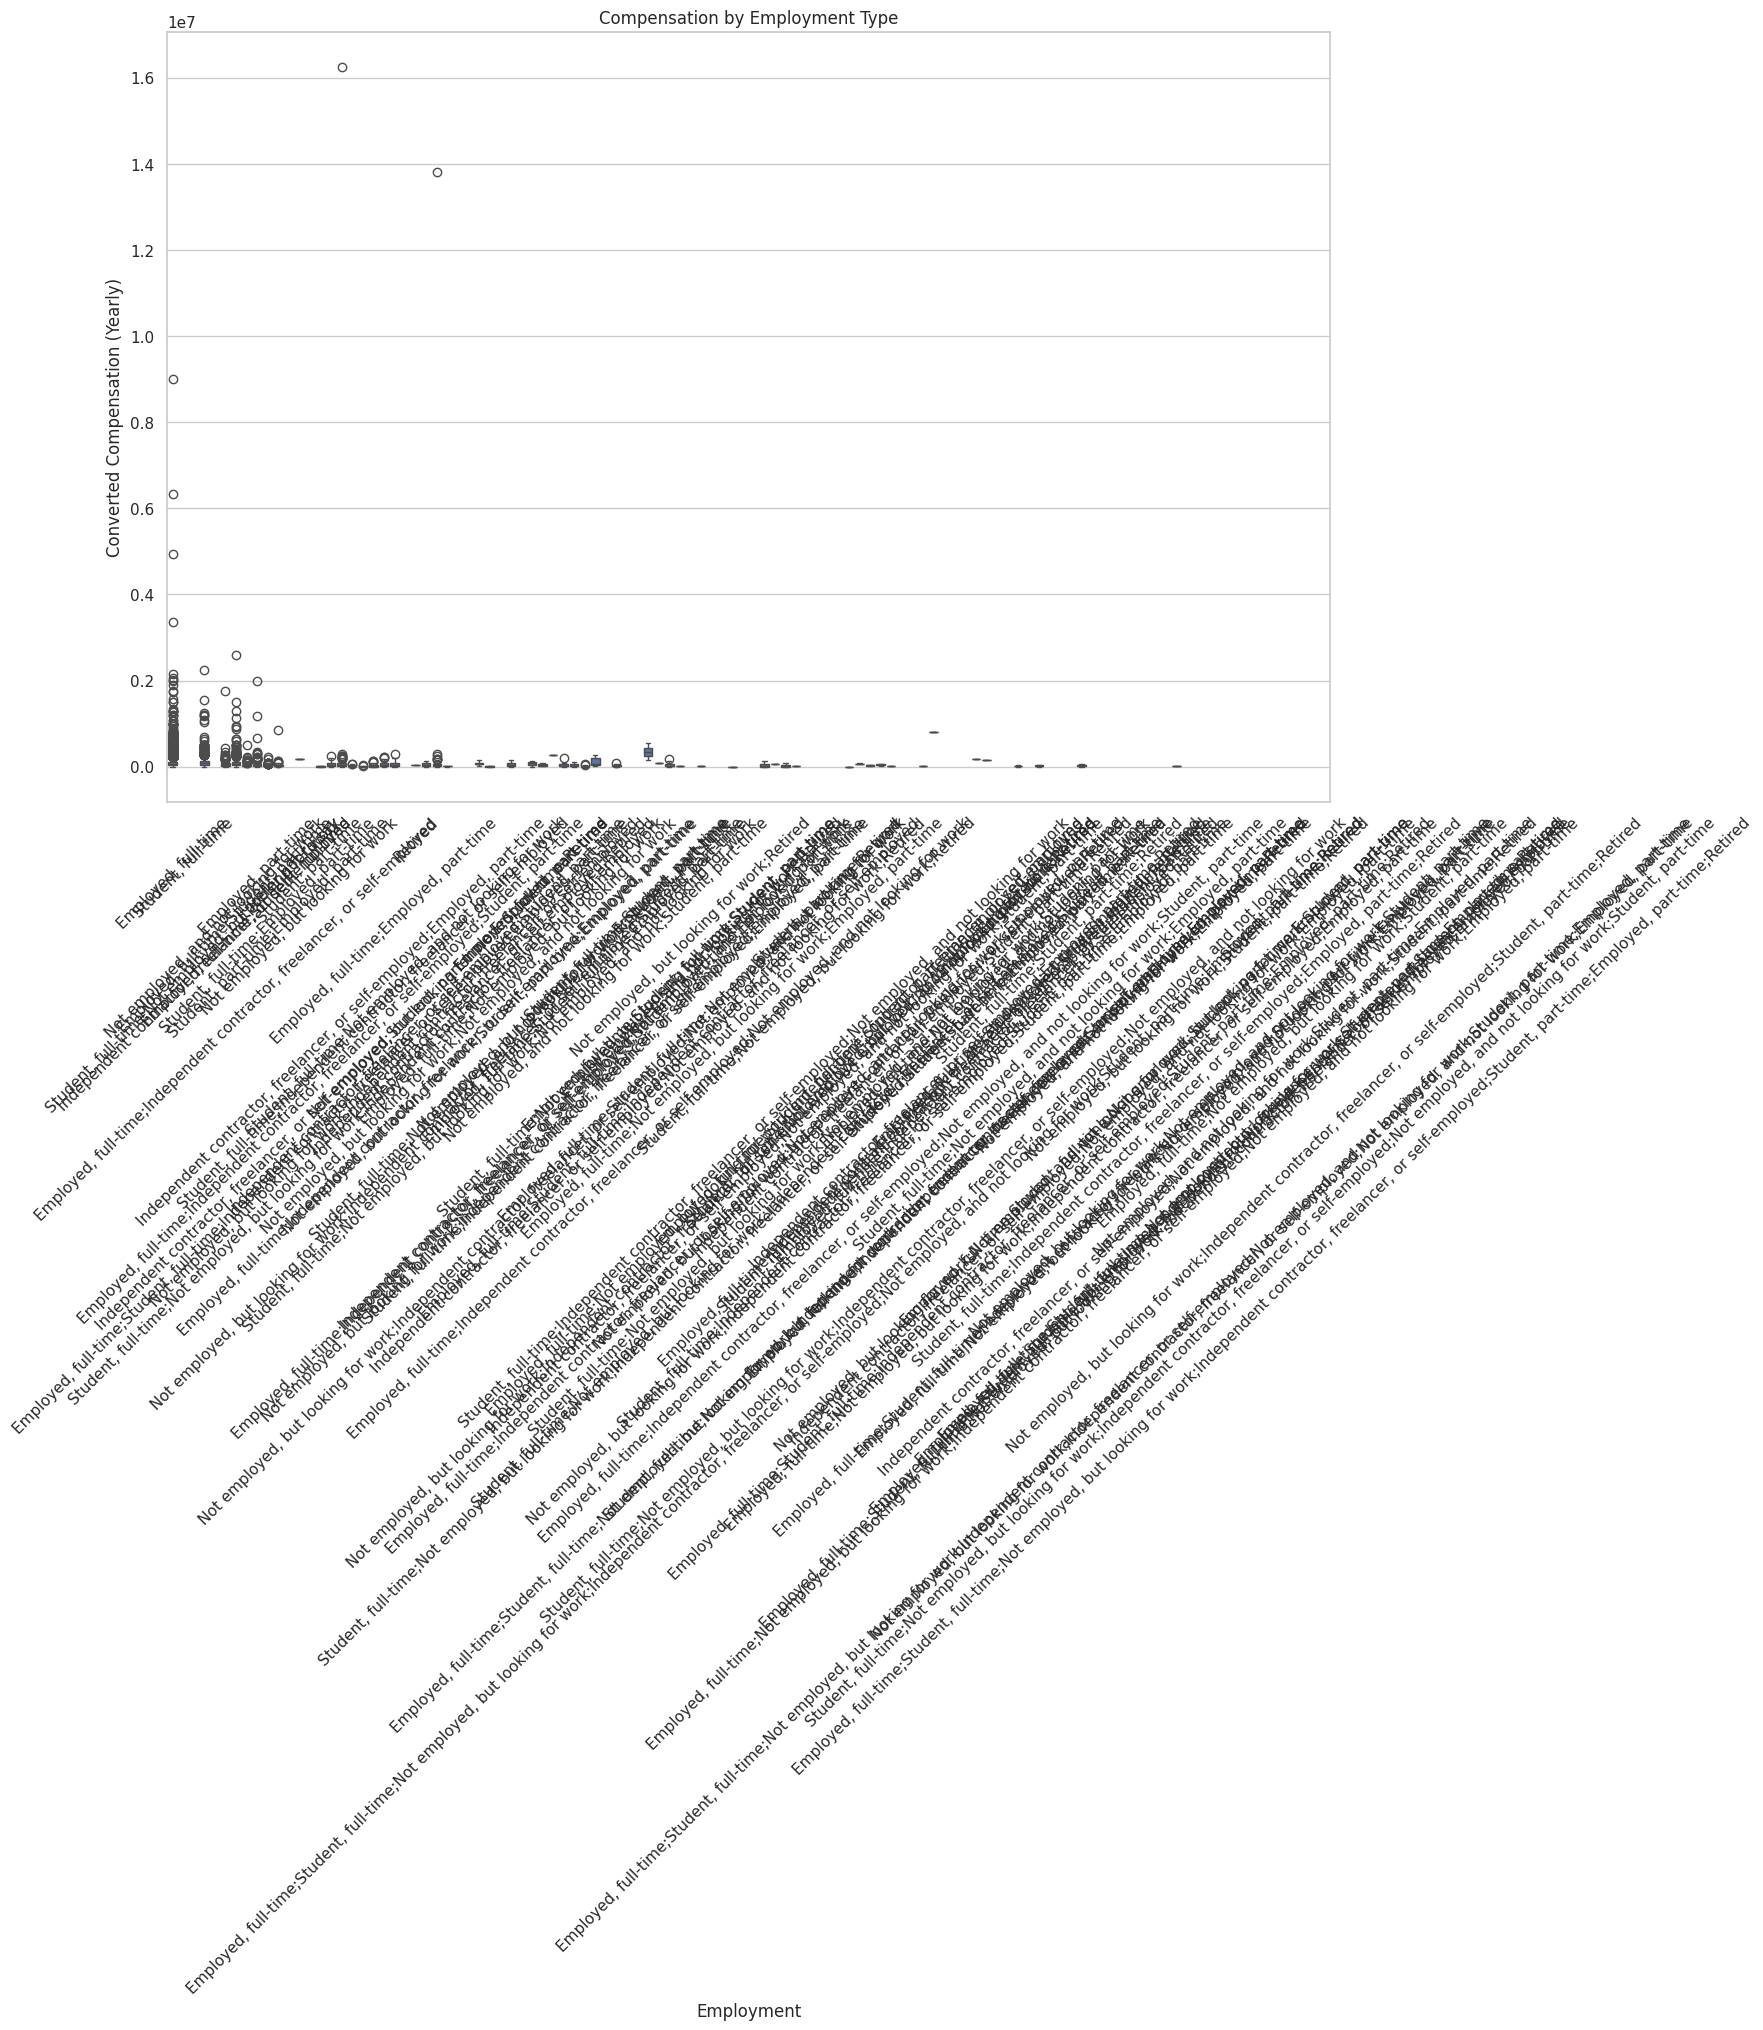

In [26]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Employment', y='ConvertedCompYearly', data=df)
plt.title('Compensation by Employment Type')
plt.xticks(rotation=45)
plt.ylabel('Converted Compensation (Yearly)')
plt.show()

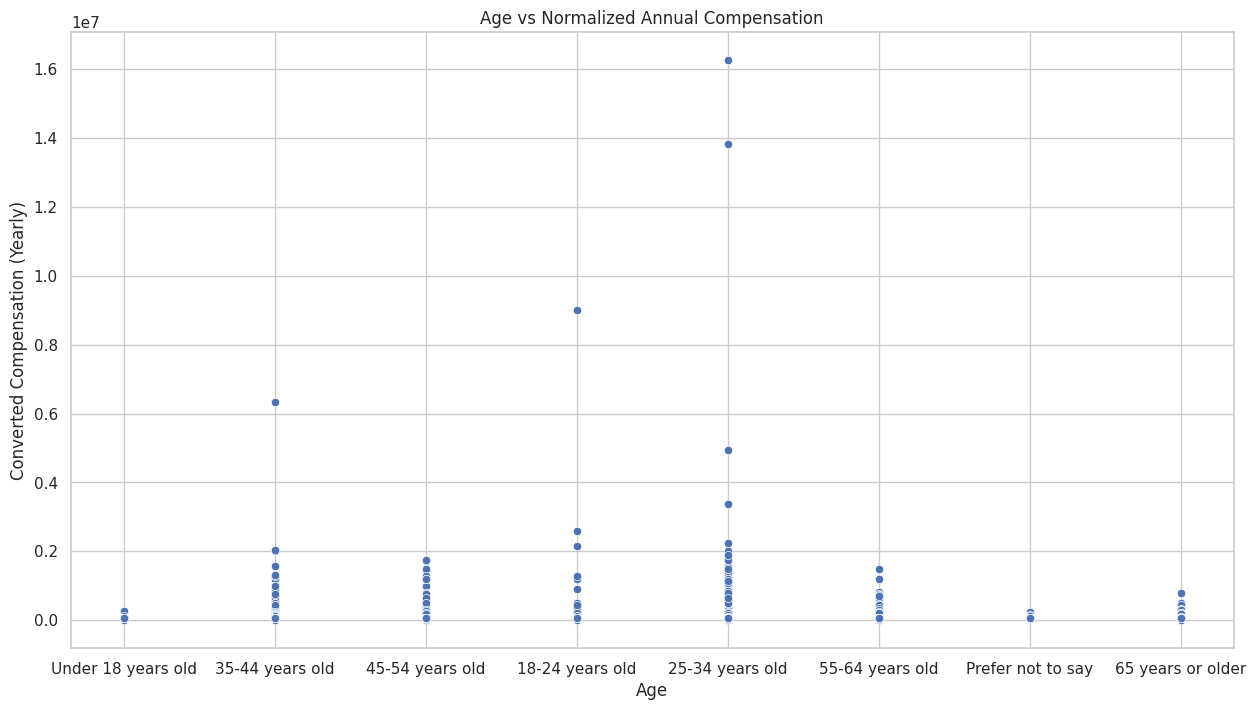

In [28]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Age', y='ConvertedCompYearly', data=new_df)
plt.title('Age vs Normalized Annual Compensation')
plt.xlabel('Age')
plt.ylabel('Converted Compensation (Yearly)')
plt.show()

Copyright © IBM Corporation. All rights reserved.
